In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [248]:
uber_data = pd.read_csv('./Data Set/Uber Drives.csv')

In [249]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [237]:
uber_data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [238]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [239]:
new_uber_data = uber_data.fillna({
    'CATEGORY*' : 'Do Not Mention',
    'PURPOSE*' : 'Do Not Mention'
})

In [250]:
new_uber_data['START*'] = new_uber_data['START*'].str.replace(' ', '', regex = True)
new_uber_data['STOP*'] = new_uber_data['STOP*'].str.replace(' ', '', regex = True)
new_uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START* contain special ?,STOP* contain special ?
0,1/1/2016 21:11,1/1/2016 21:17,Business,FortPierce,FortPierce,5.1,Meal/Entertain,1,1
1,1/2/2016 1:25,1/2/2016 1:37,Business,FortPierce,FortPierce,5.0,Do Not Mention,1,1
2,1/2/2016 20:25,1/2/2016 20:38,Business,FortPierce,FortPierce,4.8,Errand/Supplies,1,1
3,1/5/2016 17:31,1/5/2016 17:45,Business,FortPierce,FortPierce,4.7,Meeting,1,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,FortPierce,WestPalmBeach,63.7,Customer Visit,1,1
...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,1,1
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,UnknownLocation,3.9,Temporary Site,1,1
1152,12/31/2016 15:03,12/31/2016 15:38,Business,UnknownLocation,UnknownLocation,16.2,Meeting,1,1
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,1,1


In [251]:
new_uber_data['START* contain special ?'] = new_uber_data.apply(lambda x: 1 if x['START*'].isalpha() == True else 0, axis = 1)
new_uber_data['STOP* contain special ?'] = new_uber_data.apply(lambda x: 1 if x['STOP*'].isalpha() == True else 0, axis = 1)
unwanted = new_uber_data[(new_uber_data['START* contain special ?'] == 0) | (new_uber_data['STOP* contain special ?'] == 0)]
unwanted

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START* contain special ?,STOP* contain special ?
20,1/12/2016 15:13,1/12/2016 15:28,Business,HudsonSquare,Hell'sKitchen,2.4,Customer Visit,1,0
21,1/12/2016 15:42,1/12/2016 15:54,Business,Hell'sKitchen,Midtown,2.0,Errand/Supplies,0,1
417,6/8/2016 13:12,6/8/2016 13:29,Business,Seaport,Gramercy-Flatiron,3.3,Meal/Entertain,1,0
1017,12/3/2016 18:35,12/3/2016 18:56,Business,Cary,WakeCo.,6.6,Errand/Supplies,1,0
1018,12/3/2016 19:08,12/3/2016 19:15,Business,WakeCo.,Morrisville,1.8,Do Not Mention,0,1
1036,12/10/2016 12:43,12/10/2016 13:16,Business,Cary,Fuquay-Varina,15.6,Meeting,1,0
1037,12/10/2016 14:42,12/10/2016 15:18,Business,Fuquay-Varina,Cary,15.6,Errand/Supplies,0,1


In [246]:
new_uber_data['START*'] = new_uber_data['START*'].str.replace('?', 'a', regex = True)
new_uber_data['STOP*'] = new_uber_data['STOP*'].str.replace('?', 'a', regex = True)
new_uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START* contain special ?,STOP* contain special ?
0,1/1/2016 21:11,1/1/2016 21:17,Business,FortPierce,FortPierce,5.1,Meal/Entertain,1,1
1,1/2/2016 1:25,1/2/2016 1:37,Business,FortPierce,FortPierce,5.0,Do Not Mention,1,1
2,1/2/2016 20:25,1/2/2016 20:38,Business,FortPierce,FortPierce,4.8,Errand/Supplies,1,1
3,1/5/2016 17:31,1/5/2016 17:45,Business,FortPierce,FortPierce,4.7,Meeting,1,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,FortPierce,WestPalmBeach,63.7,Customer Visit,1,1
...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,0,0
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,UnknownLocation,3.9,Temporary Site,0,1
1152,12/31/2016 15:03,12/31/2016 15:38,Business,UnknownLocation,UnknownLocation,16.2,Meeting,1,1
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,1,1


In [252]:
new_uber_data.dropna(inplace = True)

In [254]:
new_uber_data.dtypes

START_DATE*                  object
END_DATE*                    object
CATEGORY*                    object
START*                       object
STOP*                        object
MILES*                      float64
PURPOSE*                     object
START* contain special ?      int64
STOP* contain special ?       int64
dtype: object

In [255]:
new_uber_data['START_DATE*'] = pd.to_datetime(new_uber_data['START_DATE*'], format='%m/%d/%Y %H:%M')
new_uber_data['END_DATE*'] = pd.to_datetime(new_uber_data['END_DATE*'], format='%m/%d/%Y %H:%M')

In [256]:
new_uber_data.dtypes

START_DATE*                 datetime64[ns]
END_DATE*                   datetime64[ns]
CATEGORY*                           object
START*                              object
STOP*                               object
MILES*                             float64
PURPOSE*                            object
START* contain special ?             int64
STOP* contain special ?              int64
dtype: object

In [257]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in new_uber_data['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
new_uber_data['HOUR'] = hour
new_uber_data['DAY'] = day
new_uber_data['DAY OF WEEK'] = dayofweek
new_uber_data['MONTH'] = month
new_uber_data['WEEKDAY'] = weekday

In [258]:
new_uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START* contain special ?,STOP* contain special ?,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,FortPierce,FortPierce,5.1,Meal/Entertain,1,1,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,FortPierce,FortPierce,5.0,Do Not Mention,1,1,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,FortPierce,FortPierce,4.8,Errand/Supplies,1,1,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,FortPierce,FortPierce,4.7,Meeting,1,1,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,FortPierce,WestPalmBeach,63.7,Customer Visit,1,1,14,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,1,1,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,UnknownLocation,3.9,Temporary Site,1,1,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,UnknownLocation,UnknownLocation,16.2,Meeting,1,1,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,1,1,21,31,5,12,Saturday


In [261]:
new_uber_data.drop(['START* contain special ?', 'STOP* contain special ?'], axis=1, inplace=True)
new_uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,FortPierce,FortPierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,FortPierce,FortPierce,5.0,Do Not Mention,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,FortPierce,FortPierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,FortPierce,FortPierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,FortPierce,WestPalmBeach,63.7,Customer Visit,14,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,UnknownLocation,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,UnknownLocation,UnknownLocation,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [262]:
new_uber_data['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

# Count by Category Chart

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

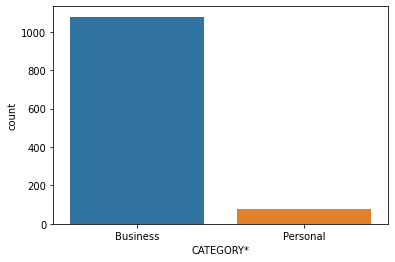

In [263]:
sns.countplot(x = 'CATEGORY*', data = new_uber_data)

# Number of Miles Travel by Uber

<AxesSubplot:ylabel='Frequency'>

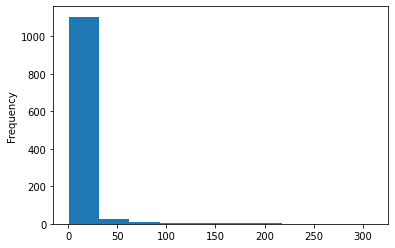

In [264]:
new_uber_data['MILES*'].plot.hist()

# Number of Trips by Hours

Text(0.5, 1.0, 'Number of Trips by Hours')

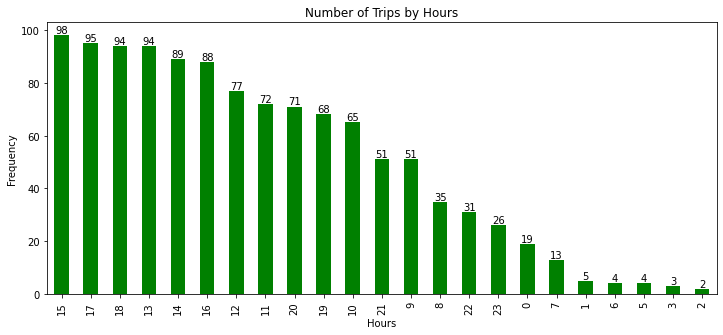

In [265]:
hours = new_uber_data['HOUR'].value_counts()
#can also write as
#hours = new_uber_data['START_DATE*'].dt.hour.value_counts()
hour_count = hours.plot(kind = 'bar', color = 'green', figsize = (12, 5))
hour_count.bar_label(hour_count.containers[0], label_type='edge')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips by Hours')

# Number of Trips by Purpose

Text(0.5, 1.0, 'Number of Trips by Purpose')

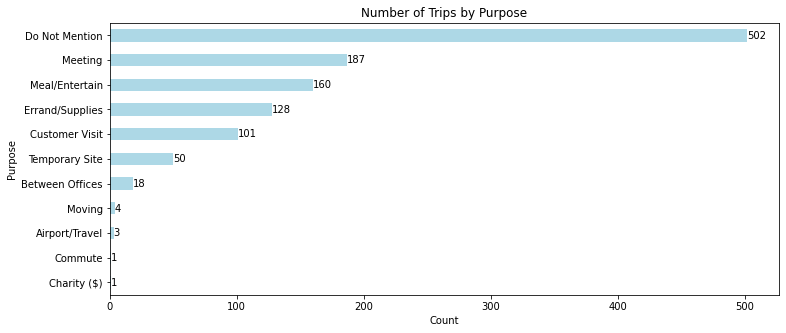

In [266]:
purpose = new_uber_data['PURPOSE*'].value_counts().sort_values().plot(kind = 'barh', color = "lightblue", figsize = (12, 5))
purpose.bar_label(purpose.containers[0], label_type='edge')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Number of Trips by Purpose')

# Number of Trips by Days

Text(0.5, 1.0, 'Number of Trips by Days')

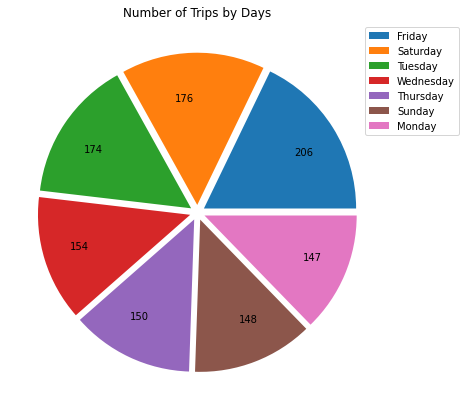

In [267]:
weekdays = new_uber_data['WEEKDAY'].value_counts()
days = new_uber_data['WEEKDAY'].unique()
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize = (7, 7))
plt.pie(weekdays,  labels = weekdays, labeldistance = 0.7, explode = explode)
plt.legend(days, bbox_to_anchor = (1.2, 1))
plt.title('Number of Trips by Days')

# Number of Trip by Date

Text(0.5, 1.0, 'Number of Trip by Date')

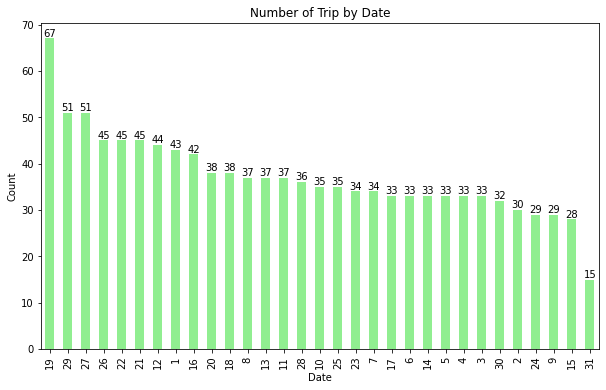

In [268]:
date = new_uber_data['DAY'].value_counts().plot(kind='bar',figsize=(10,6),color='lightgreen')
date.bar_label(date.containers[0], label_type='edge')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Trip by Date')

# Number of Trip per Month

Text(0.5, 1.0, 'Number of Trip per Month')

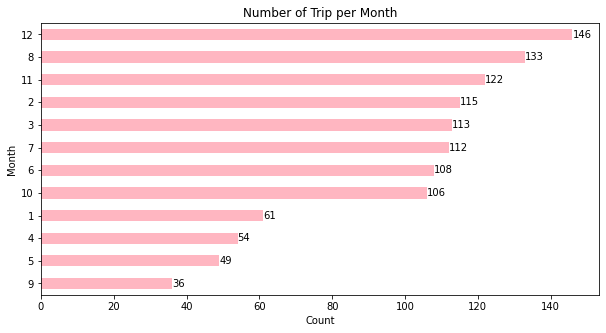

In [269]:
month = new_uber_data['MONTH'].value_counts().sort_values().plot(kind='barh',figsize=(10,5),color='lightpink')
month.bar_label(month.containers[0], label_type='edge')
plt.xlabel('Count')
plt.ylabel('Month')
plt.title('Number of Trip per Month')

# Top 10 Starting point of Trip

Text(0.5, 1.0, 'Top 10 Starting point of Trip')

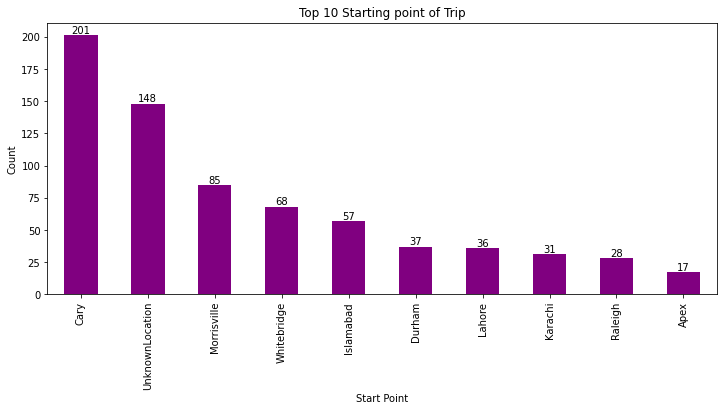

In [270]:
stp_t10 = new_uber_data['START*'].value_counts().head(10).plot(kind='bar',figsize=(12,5),color='purple')
stp_t10.bar_label(stp_t10.containers[0], label_type='edge')
plt.xlabel('Start Point')
plt.ylabel('Count')
plt.title('Top 10 Starting point of Trip')